## YCoCg color transform

In [1]:
from IPython.display import Image, display

In [2]:
#!pip install -r ../requirements.txt

### Help

In [3]:
!python ../src/YCoCg.py -h

usage: YCoCg.py [-h] [-g] {encode,decode} ...

Exploiting color (perceptual) redundancy with the YCoCg transform.

positional arguments:
  {encode,decode}  You must specify one of the following subcomands:
    encode         Encode an image
    decode         Decode an image

options:
  -h, --help       show this help message and exit
  -g, --debug      Output debug information (default: False)


In [4]:
!python ../src/YCoCg.py encode -h

usage: YCoCg.py encode [-h] [-c QUANTIZER]

options:
  -h, --help            show this help message and exit
  -c QUANTIZER, --quantizer QUANTIZER
                        Quantizer (default: deadzone)


### Encoding

In [5]:
!wget http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png -O /tmp/pajarillo.png

--2025-03-09 13:17:32--  http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png
Resolving www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Connecting to www.hpca.ual.es (www.hpca.ual.es)|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237034 (231K) [image/png]
Saving to: ‘/tmp/pajarillo.png’

/tmp/pajarillo.png  100%[===================>] 231.48K   527KB/s    in 0.4s    

2025-03-09 13:17:32 (527 KB/s) - ‘/tmp/pajarillo.png’ saved [237034/237034]



In [6]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -q 4

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=4, func=<function encode at 0x7f8ca0d22de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 148823 bytes in /tmp/encoded.TIFF
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 148824 bytes written
(INFO) entropy_image_coding: rate = 4.541748046875 bits/pixel


### Decoding

In [7]:
!python ../src/YCoCg.py decode -q 4

main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', QSS=4, func=<function decode at 0x7f1b933d2200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_coding: Read 148823 bytes from /tmp/encoded.TIFF
(INFO) blur: Using filter none with size 3
(INFO) entropy_image_coding: Written 119616 bytes in /tmp/decoded.png with shape (512, 512, 3) and type uint8
(INFO) entropy_image_coding: Total 148823 bytes read
(INFO) entropy_image_coding: Total 119617 bytes written
(INFO) entropy_image_coding: Read 215071 bytes from file:///tmp/original.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Read 119616 bytes from /tmp/decoded.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: RMSE = 3.483953476114523
(INFO) entropy_image_coding: J = R + D = 8.025701522989523


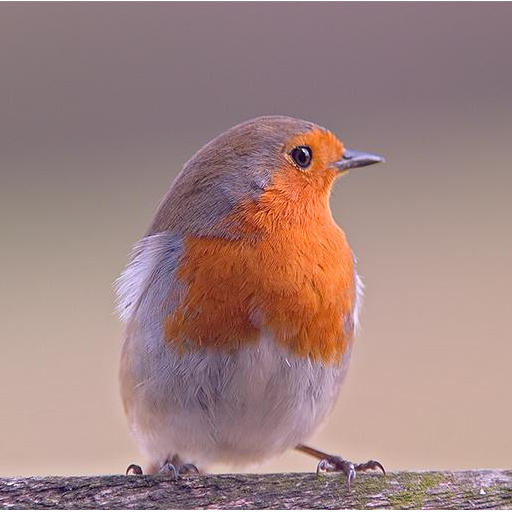

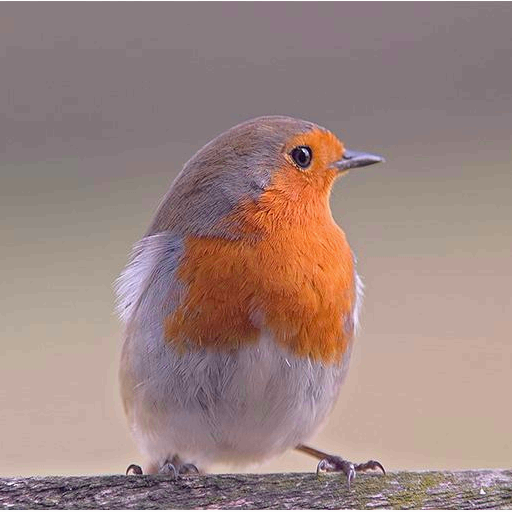

In [8]:
display(Image(filename="/tmp/pajarillo.png"))
display(Image(filename="/tmp/decoded.png"))

### Comparing with YCrCb

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=4, func=<function encode at 0x7ff582712de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
-----------------> uint8
(INFO) entropy_image_coding: Written 149890 bytes in /tmp/encoded.TIFF
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 149891 bytes written
(INFO) entropy_image_coding: rate = 4.574310302734375 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/YCrCb.png', QSS=4, func=<function decode at 0x7f3d15fca200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/YCrCb.png
(INFO) entropy_image_coding: Read 149890 

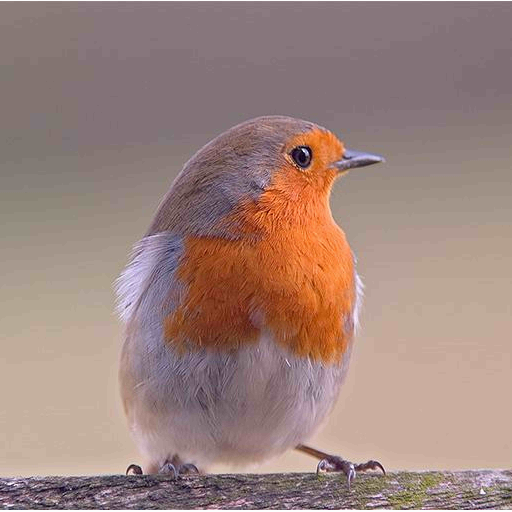

In [9]:
!python ../src/YCrCb.py encode -i /tmp/pajarillo.png -q 4
!python ../src/YCrCb.py decode -o /tmp/YCrCb.png -q 4
display(Image(filename="/tmp/YCrCb.png"))

### Using LloydMax quantization

main Namespace(debug=False, subparser_name='encode', quantizer='LloydMax', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=32, func=<function encode at 0x7fb325d1ede0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) LloydMax: QSS = 32
(INFO) LloydMax: Written /tmp/encoded_QSS.txt
(INFO) LloydMax: histogram = [    0     0     0     0     0     2     2     2     7     7     8     7
     8    13     9     3     9     9    11    12    22    10    11    18
    12    18    11    18    14    19    25    17    28    25    32    30
    40    33    33    47    35    42    56    57    61    63    71    79
    85    77   110   126   107   147   142   163   165   191   223   208
   263   248   271   317   369   351   385   378   411   482   504   484
   538   584   598   551   589   595   650   639   662   690   635   65

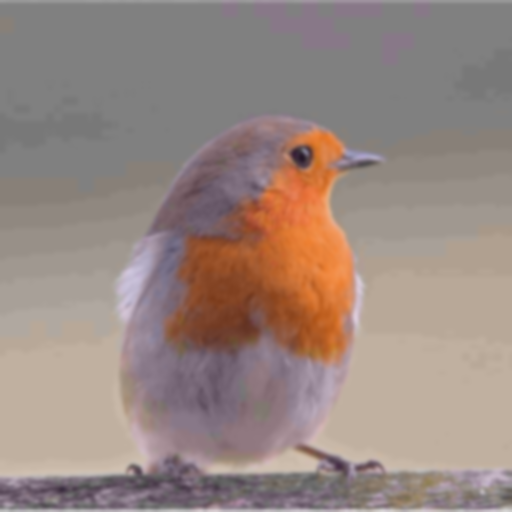

In [14]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -c LloydMax
!python ../src/YCoCg.py decode -c LloydMax
display(Image(filename="/tmp/decoded.png"))

### Using (2D) VQ

main Namespace(debug=False, subparser_name='encode', quantizer='VQ', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', block_size_VQ=4, N_clusters=256, func=<function encode at 0x7f872af1ade0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 7288 bytes in /tmp/encoded.TIFF
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 48366 bytes written
(INFO) entropy_image_coding: rate = 1.47601318359375 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='VQ', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', block_size_VQ=4, N_clusters=256, func=<function decode at 0x7f2c85fd6200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_codin

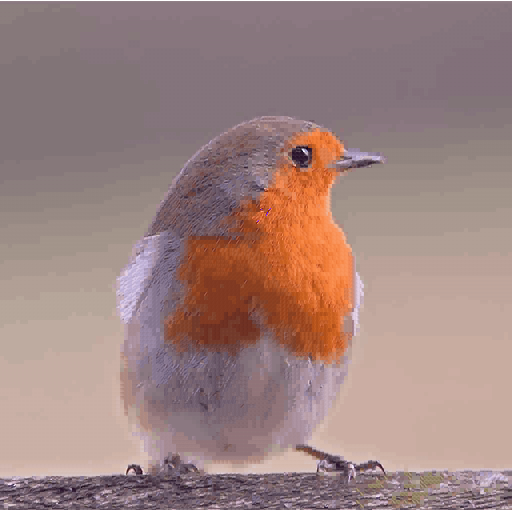

In [10]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -c VQ
!python ../src/YCoCg.py decode -c VQ
display(Image(filename="/tmp/decoded.png"))

### Using a blur filter

main Namespace(debug=False, subparser_name='encode', quantizer='VQ', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', block_size_VQ=8, N_clusters=32, func=<function encode at 0x7f4e0bb16de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 1270 bytes in /tmp/encoded.TIFF
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 21971 bytes written
(INFO) entropy_image_coding: rate = 0.670501708984375 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='VQ', entropy_image_codec='TIFF', filter='gaussian', filter_size=11, input='/tmp/encoded', output='/tmp/decoded.png', block_size_VQ=8, N_clusters=32, func=<function decode at 0x7ff46e3da200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_c

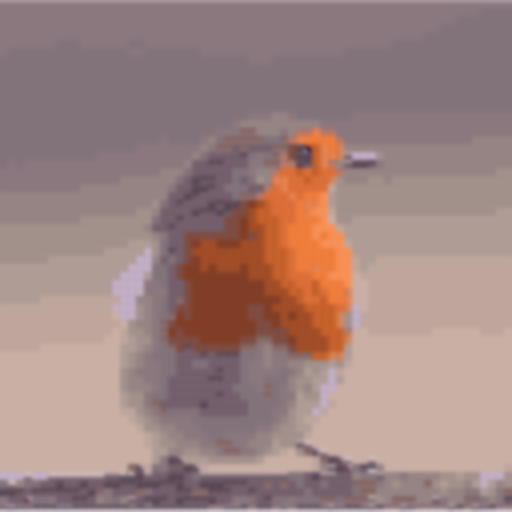

In [11]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -c VQ  -n 32 -b 8
!python ../src/YCoCg.py decode -c VQ -n 32 -b 8 -f gaussian -s 11
display(Image(filename="/tmp/decoded.png"))

### Using deadzone and QSS=8

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=8, func=<function encode at 0x7fe4f2312de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 95784 bytes in /tmp/encoded.TIFF
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 95785 bytes written
(INFO) entropy_image_coding: rate = 2.923126220703125 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', QSS=8, func=<function decode at 0x7f338f3da200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_coding: Read 95784 bytes from /tmp/encoded.

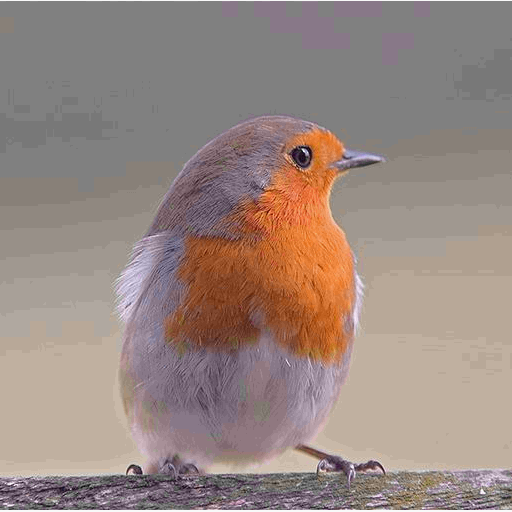

In [12]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -q 8
!python ../src/YCoCg.py decode -q 8
display(Image(filename="/tmp/decoded.png"))

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=8, func=<function encode at 0x7fbbb251ade0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 95784 bytes in /tmp/encoded.TIFF
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 95785 bytes written
(INFO) entropy_image_coding: rate = 2.923126220703125 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='TIFF', filter='gaussian', filter_size=11, input='/tmp/encoded', output='/tmp/decoded.png', QSS=8, func=<function decode at 0x7f7c143d6200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_coding: Read 95784 bytes from /tmp/enc

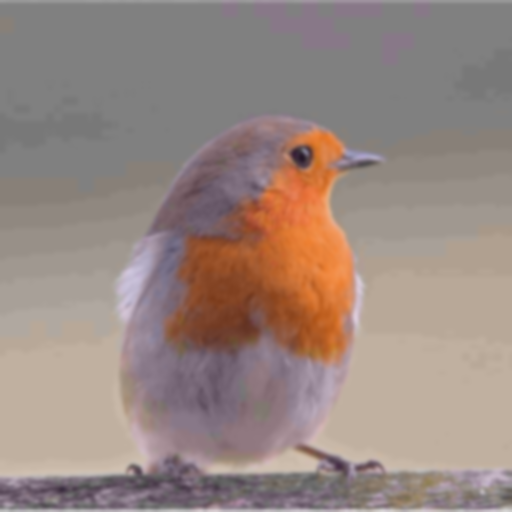

In [13]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -q 8
!python ../src/YCoCg.py decode -q 8 -f gaussian -s 11
display(Image(filename="/tmp/decoded.png"))